In [25]:
import pandas as pd
import matplotlib.pyplot as plt

#### Importing 1st dataset and getting summary stats/visualizing

In [5]:
data=pd.read_csv('C:/Users/jovan/Downloads/CPIAUCSL (1).csv')

In [6]:
data.head()

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [9]:
data.describe()

,CPIAUCSL
count,887.000000
mean,111.946647
std,78.970000
min,21.480000
25%,31.565000
50%,101.400000
75%,179.550000
max,260.817000


In [15]:
data = data.set_index('DATE')

In [16]:
data.head()

,CPIAUCSL
DATE,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


In [18]:
data=data.rename(columns={"CPIAUCSL":"CPI"})

In [19]:
data.head()

,CPI
DATE,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


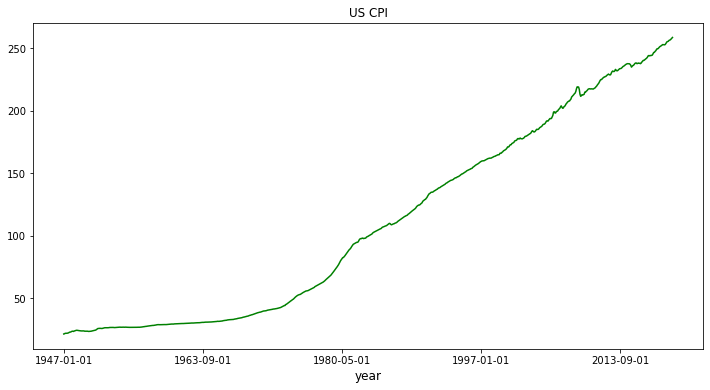

In [34]:
ax=data['1947':'2020'].plot(title='US CPI', legend=False, figsize=(12,6),color='g')
ax.set_xlabel('year',fontsize=12)
plt.show()

#### Importing 2nd dataset and visualizing/summary stats

In [36]:
data_2=pd.read_csv('C:/Users/jovan/Downloads/UNRATE.csv')
data_2.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [37]:
data_2.describe()

,UNRATE
count,875.000000
mean,5.765371
std,1.707381
min,2.500000
25%,4.500000
50%,5.600000
75%,6.800000
max,14.700000


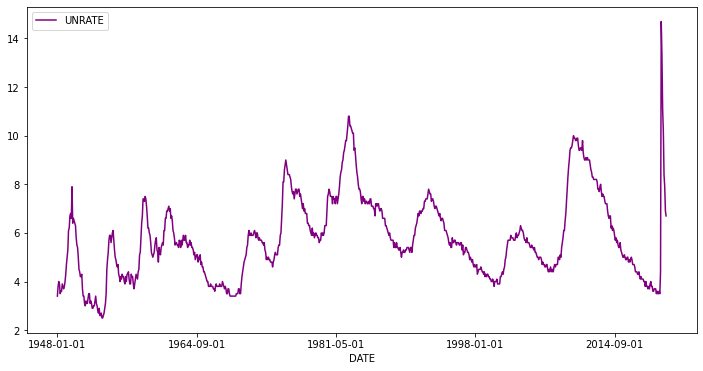

In [38]:
ax=data_2.plot(x='DATE',y='UNRATE',figsize=(12,6),color='purple')


In [44]:
data = data.reset_index()
data.head()

,index,DATE,CPI
0,0,1947-01-01,21.48
1,1,1947-02-01,21.62
2,2,1947-03-01,22.00
3,3,1947-04-01,22.00
4,4,1947-05-01,21.95


In [45]:
del data['index']


In [46]:
data.head()

,DATE,CPI
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


#### Converting datasets from monthly to yearly data

In [47]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [49]:
data.set_index('DATE', inplace=True)

In [52]:
data.resample('Y').mean()

In [53]:
data.head()

,CPI
DATE,
1947-12-31,22.331667
1948-12-31,24.045000
1949-12-31,23.809167
1950-12-31,24.062500
1951-12-31,25.973333


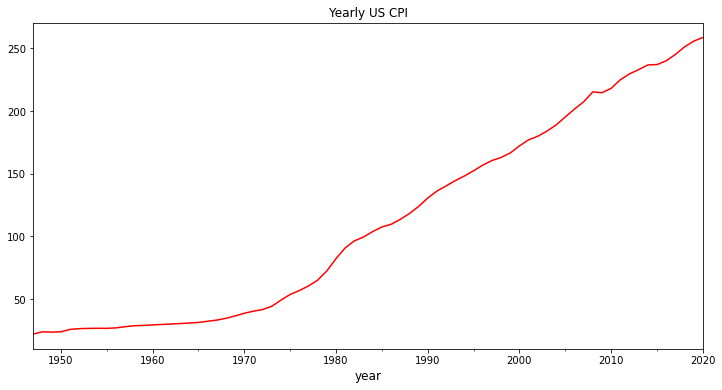

In [57]:
ax2=data['1947':'2020'].plot(title='Yearly US CPI', legend=False, figsize=(12,6),color='r')
ax2.set_xlabel('year',fontsize=12)
plt.show()

In [58]:
data_2.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [59]:
data_2['DATE'] = pd.to_datetime(data_2['DATE'])

In [61]:
data_2.set_index('DATE', inplace=True)

In [62]:
data_2.resample('Y').mean()

,UNRATE
DATE,
1948-12-31,3.750000
1949-12-31,6.050000
1950-12-31,5.208333
1951-12-31,3.283333
1952-12-31,3.025000
...,...
2016-12-31,4.875000
2017-12-31,4.341667
2018-12-31,3.891667


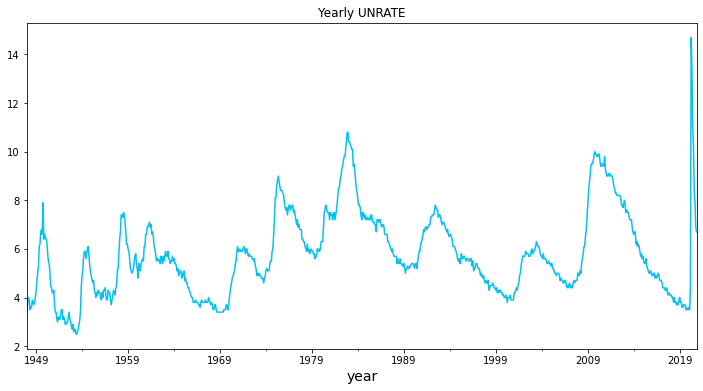

In [65]:
ax3=data_2['1948':'2020'].plot(title='Yearly UNRATE', legend=False, figsize=(12,6),color='#05c1f0')
ax3.set_xlabel('year',fontsize=14)
plt.show()

#### Merging datasets and dropping NaN's values

In [135]:
merge_data=pd.concat([data,data_2], join='outer', axis=1)

In [137]:
merge_data.head(23)

,CPI,UNRATE
DATE,,
1947-12-31,22.0,NaN
1948-01-01,NaN,3.0
1948-02-01,NaN,3.0
1948-03-01,NaN,4.0
1948-04-01,NaN,3.0
1948-05-01,NaN,3.0
1948-06-01,NaN,3.0
1948-07-01,NaN,3.0
1948-08-01,NaN,3.0


In [141]:
merge_data=merge_data.resample('Y').mean()

In [143]:
merge_data=merge_data.dropna()

In [160]:
merge_data.tail()

,CPI,UNRATE
DATE,,
2016-12-31,239.0,4.250000
2017-12-31,245.0,4.000000
2018-12-31,251.0,3.416667
2019-12-31,255.0,3.083333
2020-12-31,258.0,7.727273


#### Graphing merged dataset

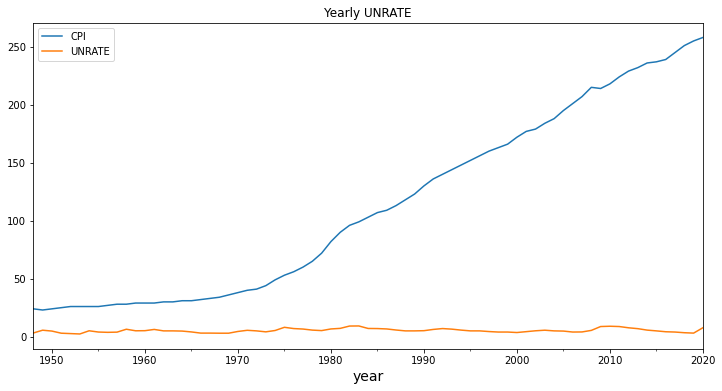

In [152]:
ax4=merge_data['1948':'2020'].plot(title='Yearly UNRATE', legend=True, figsize=(12,6))
ax4.set_xlabel('year',fontsize=14)
plt.show()

#### Running a simple linear regression model

In [155]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
X1 = merge_data['CPI']
Y1 = merge_data['UNRATE']

X1 = sm.add_constant(X1)

model2 = sm.OLS(Y1,X1).fit()
predictions1 = model2.predict(X1)

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 UNRATE   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     3.848
Date:                Tue, 22 Dec 2020   Prob (F-statistic):             0.0537
Time:                        18:33:34   Log-Likelihood:                -137.60
No. Observations:                  73   AIC:                             279.2
Df Residuals:                      71   BIC:                             283.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7751      0.330     14.469      0.0

#### Interpretation of the regression model

This linear regression model computes the relationship between CPI and the Unemployment Rate

The estimated linear regression model is:

UNRATE= 4.7751 + 0.0047*CPI

The 4.7751 in this model represents the Unemployment rate when CPI is equal to 0, however this is not significant due to our dataset not having any CPI value under 20

0.0047 in this model represents the predicted increase in Unemployment rate when CPI increases by 1 unit

The p-value is 0.054 which is just on the fringe of being significant at the 5 percent level. For the 5 percent level we may not be able to infer this relationship between UNRATE and CPI however it is very close which shows that with adding another covariate or manipulating this model it is very likely to produce a significant model. 

#### Graphing OLS plot

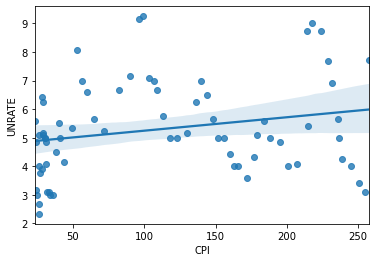

In [159]:
import seaborn as sns

sns.regplot(x='CPI', y='UNRATE', data=merge_data)